# DBSCAN. Практическая работа

## Цель практической работы

Научиться строить модели кластеризации с помощью метода DBSCAN.

## Что входит в работу


- Загрузите данные и проведите разведочный анализ.
- Предположите оптимальное количество кластеров.
- Постройте модель кластеризации DBSCAN.
- Определите оптимальное количество и структуру кластеров.
- Интерпретируйте полученные результаты.

## Что оценивается 

1. Выполнены все задания.
2. Сделаны выводы по результатам разведочного анализа данных.
3. Объяснены выбранные гиперпараметры модели кластеризации.
4. Сделаны выводы о количестве и структуре кластеров.
5. Сделаны выводы по результатам кластеризации.

# Задача

Имеется некоторый набор данных `gt_2015.csv` о производительности и других параметрах ветряных электростанций:
* AT — температура окружающей среды.
* PT — давление окружающей среды.
* AH — влажность окружающей среды. 
* AFDP — перепад давления на воздушном фильтре. 
* GTEP — давление на выходе из газовой турбины. 
* TIT — температура на входе в турбину.
* TAT — температура на выходе из турбины. 
* TEY — энергоотдача турбины.
* CDP — давление нагнетания компрессора.
* CO — выбросы угарного газа. 
* NOX — выбросы оксидов азота.

Решите задачу кластеризации электростанций для дальнейшего совместного управления схожими электростанциями.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('gt_2015.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [2]:
df.shape

(7384, 11)

In [3]:
for i in df.columns:
    print(i, sum(df[i].isna()))

AT 0
AP 0
AH 0
AFDP 0
GTEP 0
TIT 0
TAT 0
TEY 0
CDP 0
CO 0
NOX 0


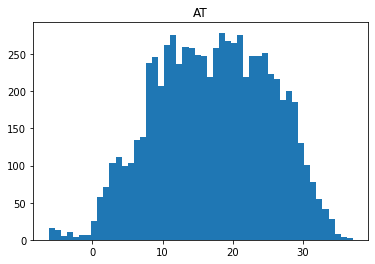

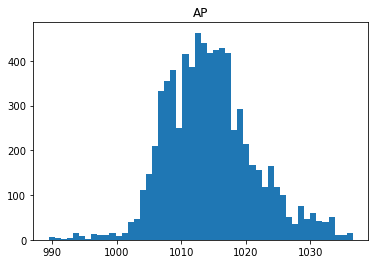

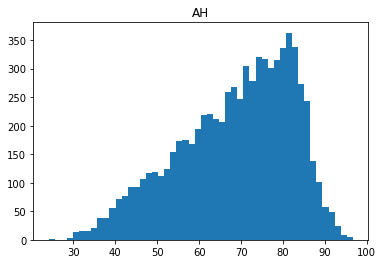

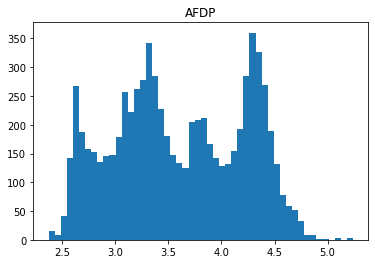

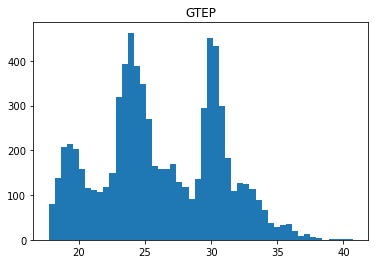

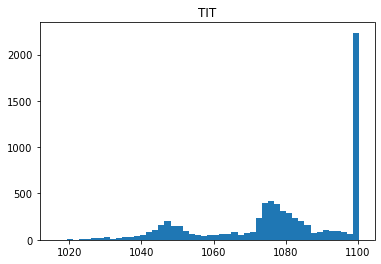

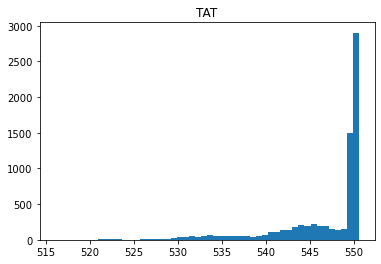

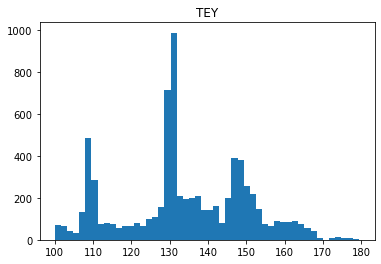

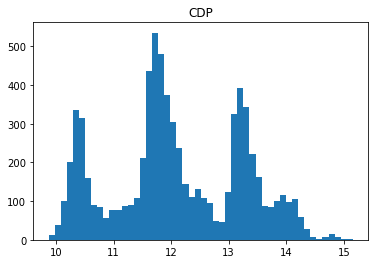

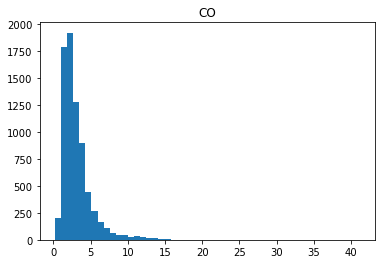

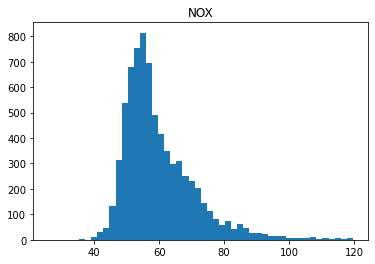

In [4]:
for i in df.columns:
    plt.hist(df[i], bins=50)
    plt.title(i)
    plt.show()

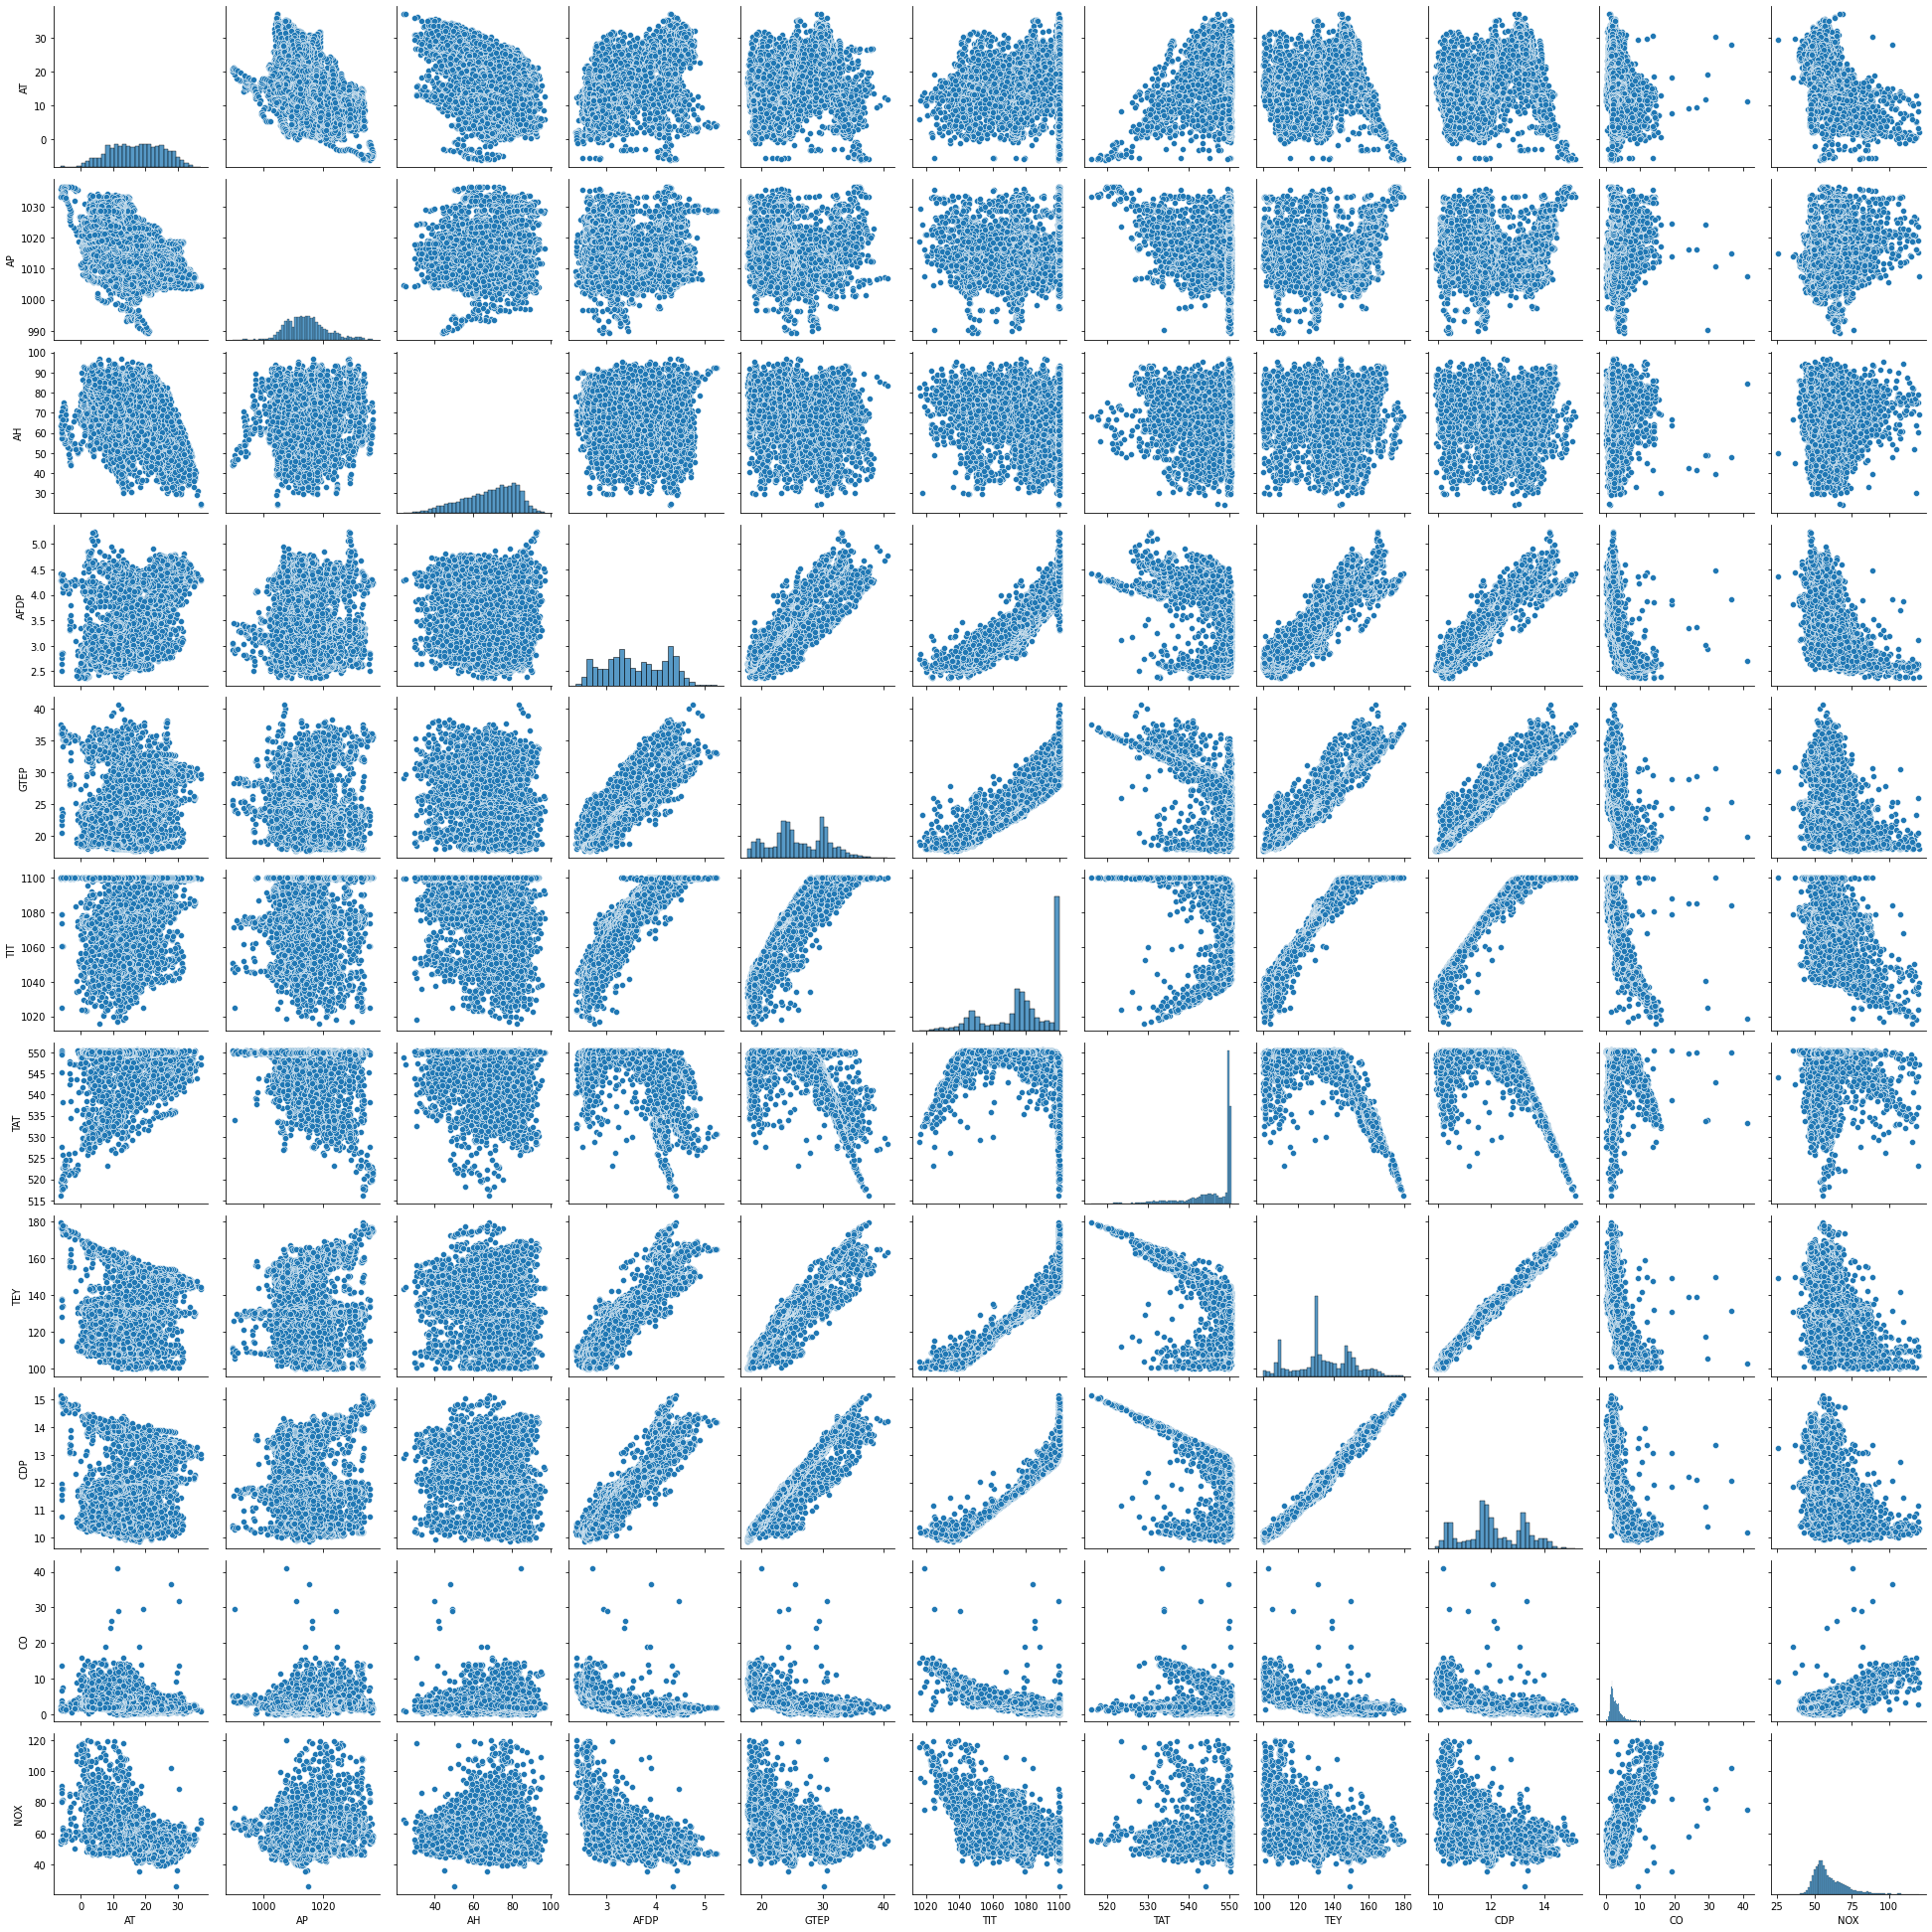

In [7]:
import seaborn as sns


sns.pairplot(df)
plt.show()

# Задание 2

Предположите по результатам разведочного анализа данных, какие группы электростанций существуют, чем они отличаются, каково их количество.

На гистограммах GTEP, TIT, TEY, CDP можно выделить по три группы электростанций с похожими характеристиками.
Также из графиков рассеяния можно заметить, что между параметрами TIT-CDP, GTEP-CDP, AFDP-CDP, TIT-TEY, GTEP-TEY, AFDP-TEY существует линейная зависимость.
Таким образом можно предположить, что существует три основные группы электростанций.

# Задание 3

Постройте модель кластеризации DBSCAN. Подберите оптимальные гиперпараметры, руководствуясь как результатами сеточного поиска, так и результатами анализа данных в предыдущих заданиях.

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

In [6]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.886549,0.810866,1.206595,-1.751125,-1.344414,-1.532034,-0.313824,-1.095516,-1.142101,1.932653,4.793468
1,-1.977232,0.810866,1.394037,-1.975155,-1.686881,-1.693968,0.338426,-1.533762,-1.539805,1.493824,4.682972
2,-2.010579,1.115436,0.715465,-1.343871,-0.864246,-0.514884,0.602605,-0.501504,-0.739998,0.225305,2.538378
3,-2.003371,1.042919,0.612586,-1.281431,-0.619691,-0.191016,0.544304,-0.110234,-0.347573,0.030076,2.442346
4,-1.968993,1.028416,0.597077,-1.247506,-0.591749,-0.140412,0.553413,-0.025552,-0.316777,-0.334116,2.032436


In [7]:
df_scaled.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7.384000e+03,7.384000e+03,7.384000e+03,7.384000e+03,7.384000e+03,7.384000e+03,7.384000e+03,7.384000e+03,7.384000e+03,7.384000e+03,7.384000e+03
mean,1.306376e-15,3.159745e-15,4.875118e-16,7.855234e-16,5.169664e-16,-1.733491e-15,1.361326e-14,-6.344389e-16,-1.182093e-16,4.261669e-16,9.148815e-16
std,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00
min,-2.898008e+00,-3.641660e+00,-3.291123e+00,-2.015963e+00,-1.884939e+00,-3.186799e+00,-5.575549e+00,-2.099959e+00,-1.958802e+00,-1.305339e+00,-3.053036e+00
25%,-7.599544e-01,-7.011075e-01,-6.794740e-01,-7.892844e-01,-6.668588e-01,-4.288569e-01,-3.452522e-01,-4.783240e-01,-5.554436e-01,-5.914641e-01,-6.729882e-01
50%,2.856504e-02,-7.383799e-02,1.701996e-01,-9.900131e-02,-1.786432e-01,6.706665e-02,5.607010e-01,-1.479394e-01,-1.443215e-01,-2.669512e-01,-2.741726e-01
75%,7.979374e-01,5.498057e-01,8.128600e-01,9.766161e-01,8.691537e-01,1.058914e+00,6.171807e-01,8.138539e-01,9.247281e-01,2.562026e-01,4.673802e-01
max,2.455487e+00,3.203917e+00,2.069285e+00,2.688680e+00,3.260549e+00,1.084216e+00,7.192086e-01,2.812851e+00,2.694159e+00,1.698891e+01,5.371097e+00


In [20]:
import numpy as np


param_grid = {
    'eps': np.arange(0.1, 1.5, 0.1),
    'min_samples': range(1, 10)
}

best_params = {
    'eps': param_grid['eps'][0],
    'min_samples': param_grid['min_samples'][0]
}

best_score = -1

for epsi in param_grid['eps']:
    for msi in param_grid['min_samples']:
        
        model = DBSCAN(eps=epsi, min_samples=msi)
        model.fit(df_scaled)
        df['labels'] = model.labels_
        
        if len(df['labels'].value_counts()) <= 1:
            continue
        else:
            score = silhouette_score(df_scaled, df['labels'])
        
        if score > best_score:
            best_score = score
            best_params = {
                'eps': epsi,
                'min_samples': msi
            }
            
            
print(best_score)

0.3794602707305792


In [21]:
best_params

{'eps': 1.4000000000000001, 'min_samples': 9}

In [25]:
model = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
model.fit(df_scaled)
df['labels'] = model.labels_

In [27]:
df['labels'].value_counts()

 0    7265
-1     119
Name: labels, dtype: int64

С помощью сеточного поиска нашли разделение на группы с лучшей метрикой, которое имеет только группу с выбросами и основную группу. Попробуем скорректировать гиперпараметры вручную, чтобы получить большее количество кластеров для анализа.

In [90]:
model = DBSCAN(eps=1.3, min_samples=7)
model.fit(df_scaled)
df['labels'] = model.labels_
df['labels'].value_counts()

 0    7236
-1     127
 1      14
 2       7
Name: labels, dtype: int64

### Задание 4

Интерпретируйте результаты кластеризации: объясните, чем схожи электростанции в каждом кластере и чем аномальные электростанции отличаются от остальных. 

In [91]:
group_out = df[df['labels'] == -1]
group_0 = df[df['labels'] == 0]
group_1 = df[df['labels'] == 1]
group_2 = df[df['labels'] == 2]

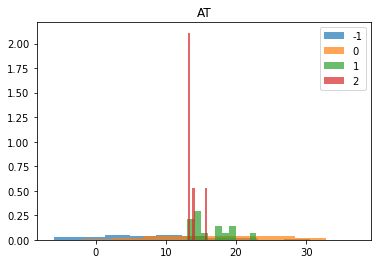

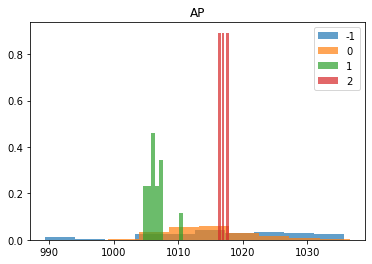

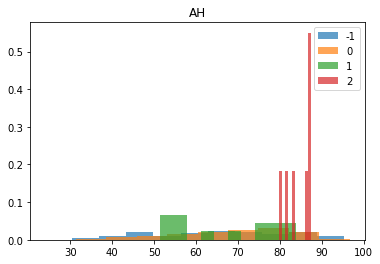

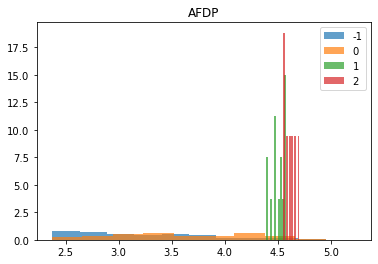

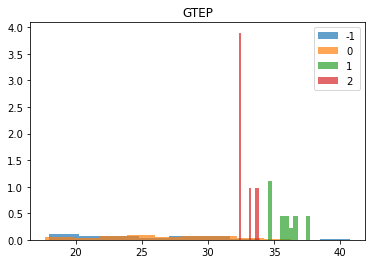

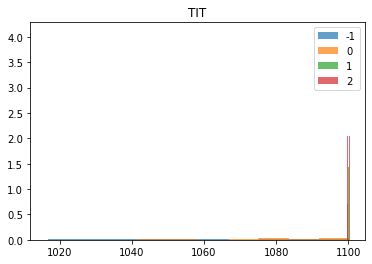

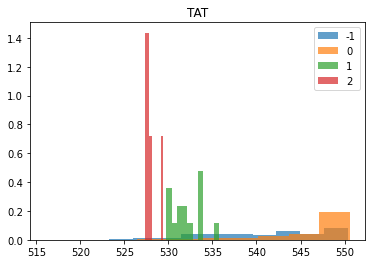

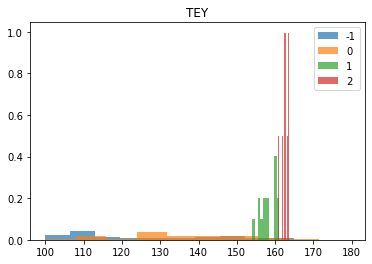

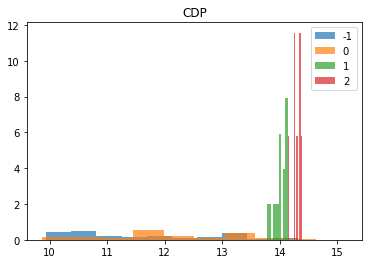

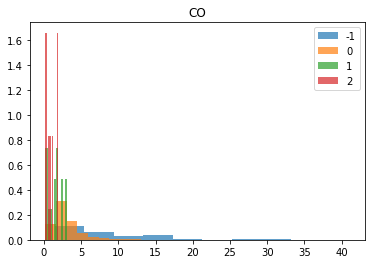

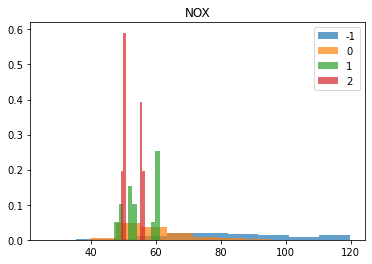

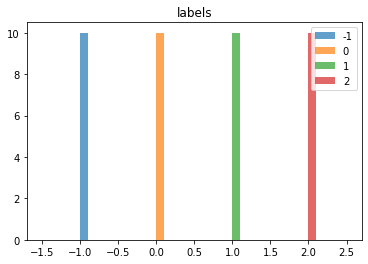

In [92]:
for i in group_0.columns:   
    plt.hist(group_out[i], density=True, alpha=0.7, label='-1')
    plt.hist(group_0[i], density=True, alpha=0.7, label='0')
    plt.hist(group_1[i], density=True, alpha=0.7, label='1')
    plt.hist(group_2[i], density=True, alpha=0.7, label='2')
    plt.legend(loc='upper right')
    plt.title(i)
    plt.show()

Аномальные электростанции для большинства признаков принимают либо максимальные, либо минимальные значения.
Группы электростанций 1 и 2 имеют видимые отличия от группы 0 в признаках AFDP, GTEP, TIT, TAT, TEY, CDP. Однако данные группы получились очень малочисленными по отношению к размеру всей выборки, поэтому, возможно, данные электростанции нет необходимости выделять в отдельные группы.

**Как отправить работу на проверку**

Скачайте файл с работой в материалах, откройте его через Jupyter Notebook и выполните задания. Сохраните изменения при помощи опции Save and Checkpoint на вкладке меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.
